**Task 1**

**Web Scrapping**

Web scraping and analysis
working in google colab to do webscrapping task.
using package called BeautifulSoup to collect the data from the web.
Once collected data and saved it into a local .csv file and start analysis.

**Scrapping Data from Skytrax**

Scraping data from Skytrax
For this particular task it is recommended that work should done with this website[https://www.airlinequality.com] after visiting this website I see that there is a lot of data there. For this particular task,interested in reviews related to British Airways and the Airline itself.

After navigating this link: [https://www.airlinequality.com/airline-reviews/british-airways] I found this data. Now, started working with Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10         # collecting data from 10 pages from above url
page_size=100

#creating an empty list to collect all reviews
reviews =[]

#creating an empty list to collect all aircraft data
aircraft =[]
#creating empty list to collect all route data
route=[]
#recommended=[]
df=pd.DataFrame()

for i in range(1,pages+1) :
     print(f'Scaping page{i}')

     #create url to collect links
     url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

     # collect HTML data from this page
     response = requests.get(url)

     # Parse content
     content = response.content
     parsed_content = BeautifulSoup(content, 'html.parser')
     for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

print(f"   ---> {len(reviews)} total reviews")   # web scrapping completed

Scaping page1
Scaping page2
Scaping page3
Scaping page4
Scaping page5
Scaping page6
Scaping page7
Scaping page8
Scaping page9
Scaping page10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"]=reviews
df.head()   # got reviews dataframe

,reviews
0,Not Verified | Another case of reviewing Brit...
1,✅ Trip Verified | On the memorable day of Janu...
2,Not Verified | I did not actually get to fly w...
3,✅ Trip Verified | We had possibly the worse ch...
4,✅ Trip Verified | I flew to LHR from ATH in C...


**Data Cleaning**

In [4]:
df  # df has 1000 rows and 1 column


,reviews
0,Not Verified | Another case of reviewing Brit...
1,✅ Trip Verified | On the memorable day of Janu...
2,Not Verified | I did not actually get to fly w...
3,✅ Trip Verified | We had possibly the worse ch...
4,✅ Trip Verified | I flew to LHR from ATH in C...
...,...
995,Not Verified | Flew out of Heathrow on 22nd F...
996,✅ Trip Verified | Horrible flight BA from Gat...
997,✅ Trip Verified | New York to Venice via Lond...
998,✅ Trip Verified | Chicago to London Heathrow....


In [5]:
#removing the text or content before | in reviews column

df.reviews= df.reviews.str.split('|', expand=True)[1]

In [6]:
df  #successfully completed

,reviews
0,Another case of reviewing British Airways fl...
1,"On the memorable day of January 9th, my famil..."
2,I did not actually get to fly with BA as they...
3,We had possibly the worse check-in experience...
4,I flew to LHR from ATH in Club Europe with B...
...,...
995,Flew out of Heathrow on 22nd Feb to New York...
996,Horrible flight BA from Gatwick to Cape Town...
997,New York to Venice via London. Staff have be...
998,Chicago to London Heathrow. Club Class on Br...


** Step 1 Cleaning the (reviews column) Text**

In [7]:
# to start working with reviews column need regex
import re

In [8]:
#defining the function
def clean(text):
  # keep only alphabets remove special characters and numericals
    text=re.sub('[^A-Za-z]+', ' ', str(text))
    return text

#cleaning the text in review column
df['new_reviews']=df['reviews'].apply(clean)    # above fumction will be called and claaning process will be done
df.head()

,reviews,new_reviews
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fli...
1,"On the memorable day of January 9th, my famil...",On the memorable day of January th my family ...
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...


Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

**step 1 Cleaning the text**

**step 2Tokenization **: Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

**step 3 Enrichment – POS tagging :** Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

**step 4 Stopwords removal** :Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

**step 5 Obtaining the stem words :** A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [9]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
#'This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
# collocations, and words that start sentences.
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict ={'J':wordnet.ADJ,'N':wordnet.NOUN,'V':wordnet.VERB,'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    new_list=[]
    for word,tag in tags:
       if word.lower() not in set(stopwords.words('english')):
          new_list.append(tuple([word,pos_dict.get(tag[0])]))
    return new_list

df['POS_tagged']=  df['new_reviews'].apply(token_stop_pos)
df.head()


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,new_reviews,POS_tagged
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fli...,"[(Another, None), (case, n), (reviewing, v), (..."
1,"On the memorable day of January 9th, my famil...",On the memorable day of January th my family ...,"[(memorable, a), (day, n), (January, n), (th, ..."
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[(actually, r), (get, v), (fly, v), (BA, n), (..."
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[(possibly, r), (worse, a), (check, n), (exper..."
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...,"[(flew, v), (LHR, n), (ATH, n), (Club, n), (Eu..."


In [11]:
#obtaining the stem words - Lematization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word,pos in pos_data:
      if not pos:
         lemma =word
         lemma__rew = lemma_rew +" "+lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word,pos=pos)
        lemma_rew = lemma_rew + " " + lemma
      return lemma_rew

df['Lemma'] = df['POS_tagged'].apply(lemmatize)
df.head()

,reviews,new_reviews,POS_tagged,Lemma
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fli...,"[(Another, None), (case, n), (reviewing, v), (...",
1,"On the memorable day of January 9th, my famil...",On the memorable day of January th my family ...,"[(memorable, a), (day, n), (January, n), (th, ...",memorable
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[(actually, r), (get, v), (fly, v), (BA, n), (...",actually
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[(possibly, r), (worse, a), (check, n), (exper...",possibly
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...,"[(flew, v), (LHR, n), (ATH, n), (Club, n), (Eu...",fly


In [12]:
df [['reviews','Lemma']]

,reviews,Lemma
0,Another case of reviewing British Airways fl...,
1,"On the memorable day of January 9th, my famil...",memorable
2,I did not actually get to fly with BA as they...,actually
3,We had possibly the worse check-in experience...,possibly
4,I flew to LHR from ATH in Club Europe with B...,fly
...,...,...
995,Flew out of Heathrow on 22nd Feb to New York...,Flew
996,Horrible flight BA from Gatwick to Cape Town...,Horrible
997,New York to Venice via London. Staff have be...,New
998,Chicago to London Heathrow. Club Class on Br...,Chicago


**Sentiment Analysis Using VADER**

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [13]:
!pip install VaderSentiment

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,new_reviews,POS_tagged,Lemma,Sentiment,Analysis
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fli...,"[(Another, None), (case, n), (reviewing, v), (...",,0.0,Neutral
1,"On the memorable day of January 9th, my famil...",On the memorable day of January th my family ...,"[(memorable, a), (day, n), (January, n), (th, ...",memorable,0.0,Neutral
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[(actually, r), (get, v), (fly, v), (BA, n), (...",actually,0.0,Neutral
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[(possibly, r), (worse, a), (check, n), (exper...",possibly,0.0,Neutral
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...,"[(flew, v), (LHR, n), (ATH, n), (Club, n), (Eu...",fly,0.0,Neutral


In [15]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Neutral     910
Negative     69
Positive     21
Name: Analysis, dtype: int64

**Wordcloud**

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

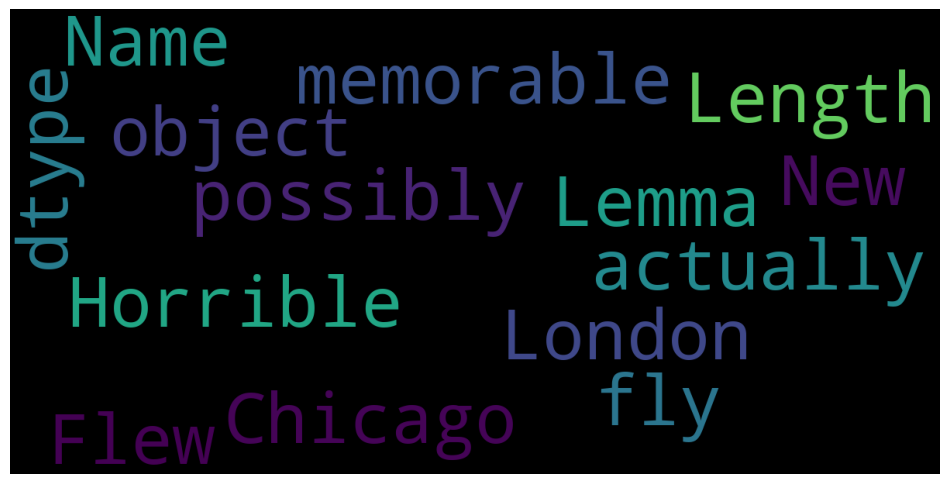

In [16]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='Black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

**Data Visualiztion**

([<matplotlib.patches.Wedge at 0x789be1382710>,
 [Text(-1.0563230795297933, 0.30689012961106144, 'Neutral'),
  Text(1.0337932060894697, -0.37586115394285646, 'Negative'),
  Text(1.3470631445873935, -0.0889993510893356, 'Positive')],
 [Text(-0.576176225198069, 0.16739461615148804, '91.0%'),
  Text(0.5638872033215289, -0.20501517487792167, '6.9%'),
  Text(0.8481508688142847, -0.056036628463655744, '2.1%')])

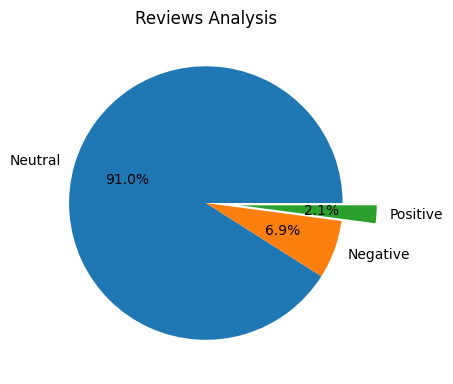

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [18]:
df.to_csv("BA_reviews.csv")

**Learings**

1. Web-scrapping
2. Data Cleaning
3. Data visualization
4. Sentiment Analysis